# License

**Fuzzy EtEPy** © 2024 by Zsófia Nagy-Perjési, Prof. Dr. Márta Takács  
is licensed under the **Creative Commons Attribution–NonCommercial 4.0 International (CC BY-NC 4.0)**.  
See: [https://creativecommons.org/licenses/by-nc/4.0/](https://creativecommons.org/licenses/by-nc/4.0/)

You may use and adapt this notebook for non-commercial purposes, as long as you give appropriate credit.


Expert based FCM Simulation with test data Line 58

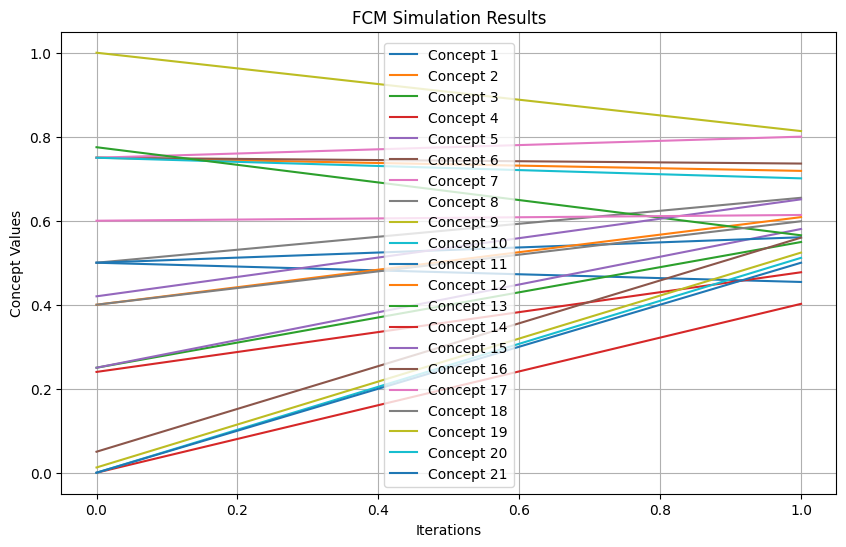

Simulation Results: [[0.5        0.75       0.25       0.         0.25       0.75
  0.75       0.5        1.         0.75       0.5        0.4
  0.775      0.24       0.42       0.05       0.6        0.4
  0.0125     0.         0.        ]
 [0.45419132 0.71865505 0.54931416 0.40209344 0.58029877 0.73609112
  0.80017684 0.65461216 0.81343708 0.70087647 0.56062525 0.60854493
  0.56529375 0.47730311 0.65092327 0.55971365 0.61372562 0.59868766
  0.52414371 0.51166039 0.5       ]]
Overall Risk Percentage: 50.00%


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the weight matrix from a CSV file
weight_matrix = pd.read_csv('Mentalmodeler_extract_06122024.csv', index_col=0)
connection_matrix = weight_matrix.values

# Number of concepts
n_concepts = connection_matrix.shape[0]

# Load initial state values from a CSV file or define manually
# Create a CSV file named 'initial_values.csv' with one value per concept
# Alternatively, set manually as a list, e.g., initial_values = [0.5, 0.3, ..., 0.6]
initial_values_df = pd.read_csv('initial_values_template_Line 58_sequential order.csv')
initial_values = initial_values_df['InitialValue'].values

# Ensure the length matches the number of concepts
if len(initial_values) != n_concepts:
    raise ValueError("The number of initial values must match the number of concepts.")

initial_state = np.array(initial_values)

# Define the number of iterations for the simulation
iterations = 1

# Activation function (Sigmoid function)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Simulation function
def simulate_fcm(connection_matrix, initial_state, iterations):
    states = [initial_state]
    current_state = initial_state
    for _ in range(iterations):
        next_state = sigmoid(np.dot(connection_matrix, current_state))
        states.append(next_state)
        current_state = next_state
    return np.array(states)

# Run the simulation
results = simulate_fcm(connection_matrix, initial_state, iterations)

# Plotting the results
plt.figure(figsize=(10, 6))
for i in range(n_concepts):
    plt.plot(results[:, i], label=f'Concept {i+1}')

plt.title('FCM Simulation Results')
plt.xlabel('Iterations')
plt.ylabel('Concept Values')
plt.legend()
plt.grid(True)
plt.show()

print("Simulation Results:", results)
# Display the final risk percentage for the 21st concept
overall_risk_percentage = results[-1][-1] * 100
print(f"Overall Risk Percentage: {overall_risk_percentage:.2f}%")

In [ ]:
Historical based FCM Simulation with test data Line 58

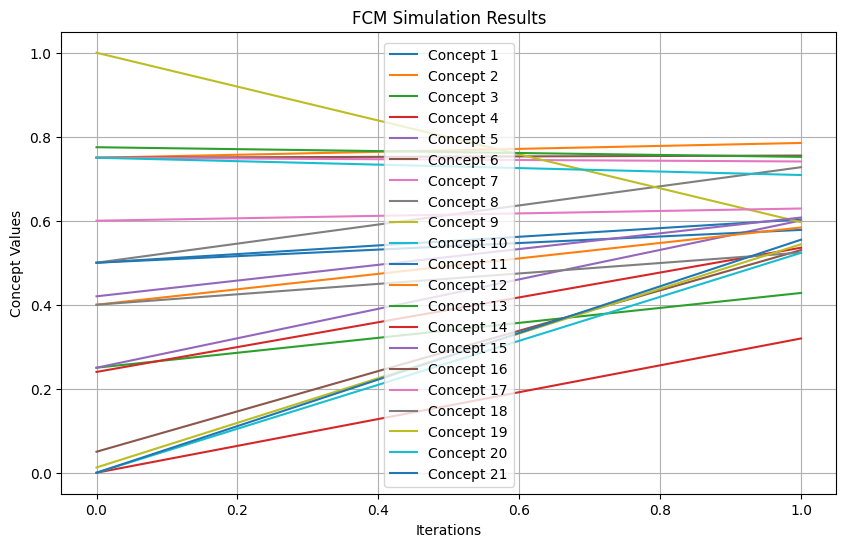

Simulation Results: [[0.5        0.75       0.25       0.         0.25       0.75
  0.75       0.5        1.         0.75       0.5        0.4
  0.775      0.24       0.42       0.05       0.6        0.4
  0.0125     0.         0.        ]
 [0.60302799 0.7851591  0.42801044 0.31964245 0.60067949 0.75517304
  0.74105767 0.72740287 0.59647221 0.70885183 0.5781327  0.58383821
  0.75202432 0.53578804 0.6075946  0.53017236 0.62905776 0.52413229
  0.54399809 0.5234957  0.55482558]]
Overall Risk Percentage: 55.48%


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the weight matrix from a CSV file
weight_matrix = pd.read_csv('correlation_weight_matrix_30112024_cleared.csv', index_col=0)
connection_matrix = weight_matrix.values

# Number of concepts
n_concepts = connection_matrix.shape[0]

# Load initial state values from a CSV file or define manually
# Create a CSV file named 'initial_values.csv' with one value per concept
# Alternatively, set manually as a list, e.g., initial_values = [0.5, 0.3, ..., 0.6]
initial_values_df = pd.read_csv('initial_values_template_Line 58_sequential order.csv')
initial_values = initial_values_df['InitialValue'].values

# Ensure the length matches the number of concepts
if len(initial_values) != n_concepts:
    raise ValueError("The number of initial values must match the number of concepts.")

initial_state = np.array(initial_values)

# Define the number of iterations for the simulation
iterations = 1

# Activation function (Sigmoid function)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Simulation function
def simulate_fcm(connection_matrix, initial_state, iterations):
    states = [initial_state]
    current_state = initial_state
    for _ in range(iterations):
        next_state = sigmoid(np.dot(connection_matrix, current_state))
        states.append(next_state)
        current_state = next_state
    return np.array(states)

# Run the simulation
results = simulate_fcm(connection_matrix, initial_state, iterations)

# Plotting the results
plt.figure(figsize=(10, 6))
for i in range(n_concepts):
    plt.plot(results[:, i], label=f'Concept {i+1}')

plt.title('FCM Simulation Results')
plt.xlabel('Iterations')
plt.ylabel('Concept Values')
plt.legend()
plt.grid(True)
plt.show()

print("Simulation Results:", results)

# Display the final risk percentage for the 21st concept
overall_risk_percentage = results[-1][-1] * 100
print(f"Overall Risk Percentage: {overall_risk_percentage:.2f}%")

In [ ]:
NHL Tranining Test for Historical weight matrix

In [6]:
import numpy as np
import pandas as pd

def sigmoid(x):
    """ Sigmoid activation function. """
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """ Derivative of the sigmoid function. """
    return sigmoid(x) * (1 - sigmoid(x))

def train_fcm_nhl(weight_matrix, initial_state, target_state, learning_rate=0.01, iterations=100):
    """
    Train an FCM using Nonlinear Hebbian Learning (NHL).
    
    Args:
    weight_matrix (np.array): Initial weights of the FCM.
    initial_state (np.array): Initial state of the concepts.
    target_state (np.array): Target state to train towards.
    learning_rate (float): Learning rate for weight updates.
    iterations (int): Number of training iterations.

    Returns:
    np.array: The trained weight matrix.
    """
    num_concepts = len(initial_state)
    state = initial_state.copy()
    
    for iteration in range(iterations):
        # Calculate concept activations
        activations = sigmoid(np.dot(weight_matrix, state))
        
        # Update state for next iteration
        state = activations.copy()
        
        # Calculate error (difference from target state)
        error = target_state - activations
        
        # Update weights based on the NHL rule
        for i in range(num_concepts):
            for j in range(num_concepts):
                if i != j:  # Typically, self-loops are not updated in FCMs
                    delta_w = learning_rate * error[j] * sigmoid_derivative(activations[j]) * state[i]
                    weight_matrix[i, j] += delta_w

    return weight_matrix

# Load the weight matrix and keep column names
df = pd.read_csv('correlation_weight_matrix_30112024_cleared.csv', index_col=0)
weight_matrix = df.values
columns = df.columns

# Assume some initial and target states (must be provided or generated)
initial_state = np.random.rand(len(columns))
target_state = np.random.rand(len(columns))  # This should be your actual target data

# Train the FCM
trained_weights = train_fcm_nhl(weight_matrix, initial_state, target_state, learning_rate=0.001, iterations=500)

# Save the trained weight matrix to a new CSV
pd.DataFrame(trained_weights, index=columns, columns=columns).to_csv('NHL_trained_weight_matrix_Data_based_061202024.csv')